In [1]:
import pandas as pd

# Specify the file path to your CSV file
file_path = "job_descriptions.csv"

# Use pandas to read the CSV file and create a DataFrame
df = pd.read_csv(file_path)

In [3]:
df.head()


,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
0,1089843540111562,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,...,001-381-930-7517x737,Digital Marketing Specialist,Social Media Manager,Snagajob,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie..."
1,398454096642776,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,...,461-509-4216,Web Developer,Frontend Web Developer,Idealist,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com..."
2,481640072963533,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,...,9687619505,Operations Manager,Quality Control Manager,Jobs2Careers,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P..."
3,688192671473044,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,...,+1-820-643-5431x47576,Network Engineer,Wireless Network Engineer,FlexJobs,"Wireless Network Engineers design, implement, ...","{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O..."
4,117057806156508,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,-35.6751,-71.5429,Intern,53944,...,343.975.4702x9340,Event Manager,Conference Manager,Jobs2Careers,A Conference Manager coordinates and manages c...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ..."


In [4]:
# Get a list of all the column names
column_names = df.columns.tolist()

# Print the list of column names
print(column_names)

['Job Id', 'Experience', 'Qualifications', 'Salary Range', 'location', 'Country', 'latitude', 'longitude', 'Work Type', 'Company Size', 'Job Posting Date', 'Preference', 'Contact Person', 'Contact', 'Job Title', 'Role', 'Job Portal', 'Job Description', 'Benefits', 'skills', 'Responsibilities', 'Company', 'Company Profile']


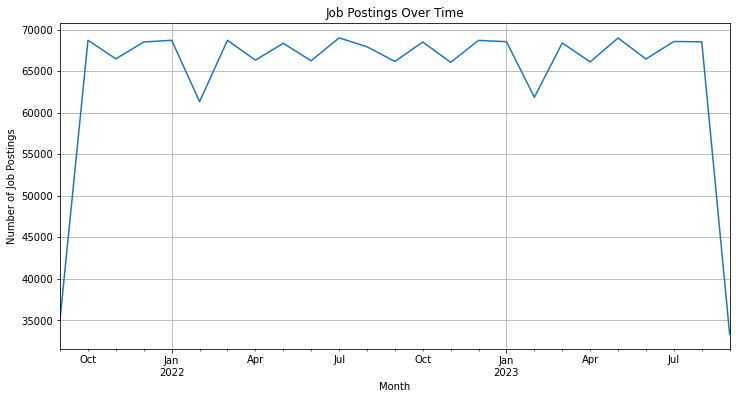

In [5]:
import matplotlib.pyplot as plt

# Convert 'Job Posting Date' to datetime
df['Job Posting Date'] = pd.to_datetime(df['Job Posting Date'])

# Group by month and count job postings
job_posting_count = df.groupby(df['Job Posting Date'].dt.to_period("M")).size()

# Plot the time series
plt.figure(figsize=(12, 6))
job_posting_count.plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Number of Job Postings')
plt.title('Job Postings Over Time')
plt.grid(True)
plt.show()


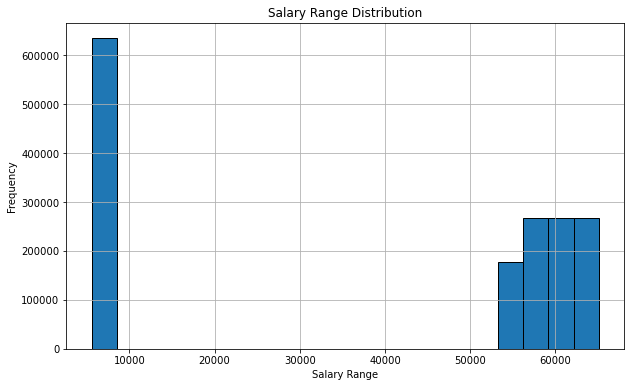

In [6]:
# Remove any non-numeric characters from 'Salary Range' and convert to numeric
df['Salary Range'] = df['Salary Range'].str.replace('[^\d]', '', regex=True).astype(float)

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Salary Range'], bins=20, edgecolor='k')
plt.xlabel('Salary Range')
plt.ylabel('Frequency')
plt.title('Salary Range Distribution')
plt.grid(True)
plt.show()


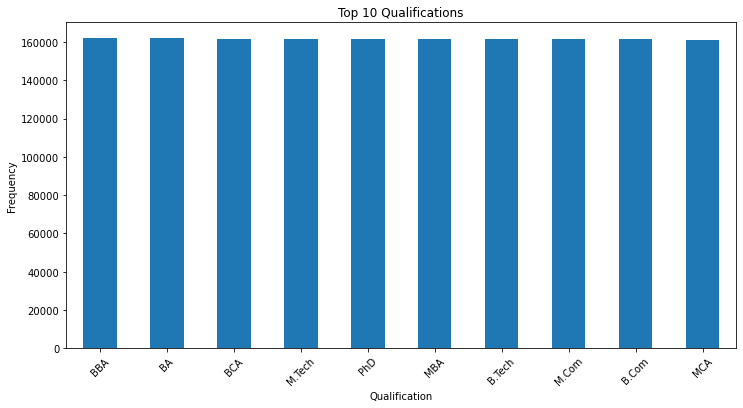

In [7]:
# Split qualifications into a list of qualifications
df['Qualifications'] = df['Qualifications'].str.split(',')

# Flatten the list of qualifications
qualifications_list = [qual for sublist in df['Qualifications'].dropna() for qual in sublist]

# Count the frequency of each qualification
qualification_counts = pd.Series(qualifications_list).value_counts()

# Plot the top 10 qualifications
plt.figure(figsize=(12, 6))
qualification_counts.head(10).plot(kind='bar')
plt.xlabel('Qualification')
plt.ylabel('Frequency')
plt.title('Top 10 Qualifications')
plt.xticks(rotation=45)
plt.show()


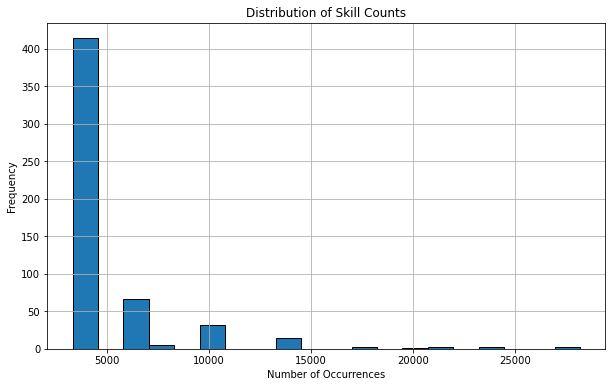

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your DataFrame from the CSV file (if not already loaded)
# Replace 'job_descriptions.csv' with your file path
df = pd.read_csv('job_descriptions.csv')

# Create an empty list to store all mentioned skills
all_skills = []

# Iterate through each row in the DataFrame
for skills_str in df['skills'].dropna():
    # Split the skills string into individual skills
    skills = [skill.strip() for skill in skills_str.split(',')]
    # Extend the all_skills list with the individual skills
    all_skills.extend(skills)

# Create a dictionary to count the occurrences of each skill
skill_counts = {}
for skill in all_skills:
    if skill in skill_counts:
        skill_counts[skill] += 1
    else:
        skill_counts[skill] = 1

# Convert the skill_counts dictionary to a list of counts
counts = list(skill_counts.values())

# Create a histogram to visualize the distribution of skill counts
plt.figure(figsize=(10, 6))
plt.hist(counts, bins=20, edgecolor='k')
plt.xlabel('Number of Occurrences')
plt.ylabel('Frequency')
plt.title('Distribution of Skill Counts')
plt.grid(True)
plt.show()


/var/folders/w3/xj4z3whx3ms1s28yvm3v87r80000gn/T/ipykernel_12736/4203977496.py:39: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 864x432 with 0 Axes>

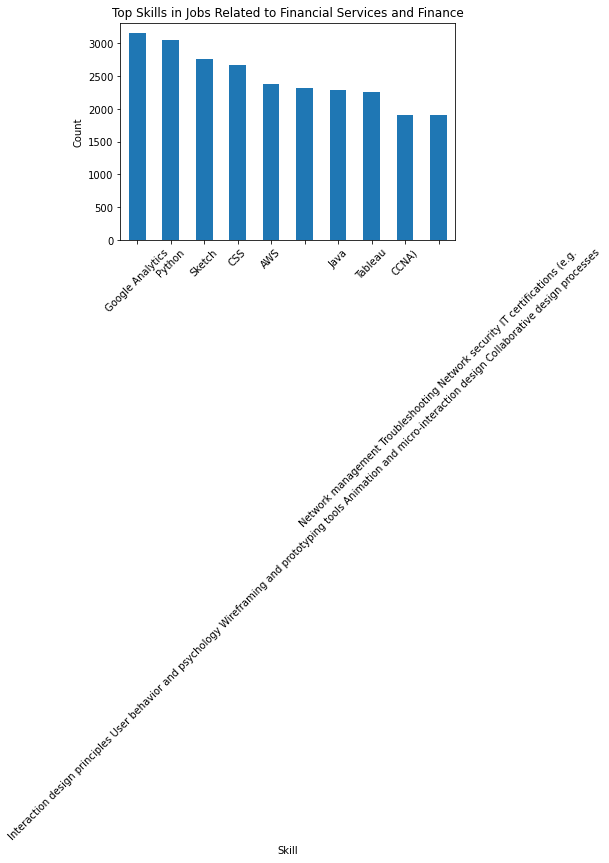

In [10]:

# Define the keywords related to financial services and finance
keywords = ['Financial Services', 'Finance']

# Filter job listings where 'Company Profile' contains the keywords
filtered_df = df[df['Company Profile'].str.contains('|'.join(keywords), case=False, na=False)]

# Create an empty list to store all mentioned skills in filtered job listings
filtered_skills = []

# Iterate through each row in the filtered DataFrame
for skills_str in filtered_df['skills'].dropna():
    # Split the skills string into individual skills
    skills = [skill.strip() for skill in skills_str.split(',')]
    # Extend the filtered_skills list with the individual skills
    filtered_skills.extend(skills)

# Create a dictionary to count the occurrences of each skill in filtered job listings
filtered_skill_counts = {}
for skill in filtered_skills:
    if skill in filtered_skill_counts:
        filtered_skill_counts[skill] += 1
    else:
        filtered_skill_counts[skill] = 1

# Convert the filtered_skill_counts dictionary to a DataFrame for sorting
filtered_skills_df = pd.DataFrame.from_dict(filtered_skill_counts, orient='index', columns=['Count'])
filtered_skills_df = filtered_skills_df.sort_values(by='Count', ascending=False)

# Rank the most sought-after skills based on counts
top_skills = filtered_skills_df.head(10)  # Change the number to display a different number of top skills

# Plot the distribution of skill counts for the top skills
plt.figure(figsize=(12, 6))
top_skills.plot(kind='bar', legend=None)
plt.xlabel('Skill')
plt.ylabel('Count')
plt.title('Top Skills in Jobs Related to Financial Services and Finance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:

# Define the keywords related to financial services and finance
keywords = ['Financial Services', 'Finance']

# Filter job listings where 'Company Profile' contains the keywords
filtered_df = df[df['Company Profile'].str.contains('|'.join(keywords), case=False, na=False)]

# Create an empty list to store all mentioned skills in filtered job listings
filtered_skills = []

# Iterate through each row in the filtered DataFrame
for skills_str in filtered_df['skills'].dropna():
    # Split the skills string into individual skills
    skills = [skill.strip() for skill in skills_str.split(',')]
    # Extend the filtered_skills list with the individual skills
    filtered_skills.extend(skills)

# Create a dictionary to count the occurrences of each skill in filtered job listings
filtered_skill_counts = {}
for skill in filtered_skills:
    if skill in filtered_skill_counts:
        filtered_skill_counts[skill] += 1
    else:
        filtered_skill_counts[skill] = 1

# Create a DataFrame table for the skills and their counts
skill_table = pd.DataFrame(filtered_skill_counts.items(), columns=['Skill', 'Count'])

# Rank the skills based on counts
ranked_skill_table = skill_table.sort_values(by='Count', ascending=False)


# Display the top 50 skills
top_50_skills = ranked_skill_table.head(50)
print(top_50_skills)

                                                 Skill  Count
113                                   Google Analytics   3159
72                                              Python   3052
150                                             Sketch   2760
1                                                  CSS   2671
68                                                 AWS   2376
44   Interaction design principles User behavior an...   2321
19                                                Java   2285
161                                            Tableau   2254
54                                               CCNA)   1913
53   Network management Troubleshooting Network sec...   1913
149  User-centered design principles UX/UI design t...   1609
151  Adobe XD) Wireframing and prototyping Usabilit...   1609
79   Procurement processes Vendor assessment Contra...   1575
103                                         MS Office)   1568
349                                    Adobe Photoshop   1566
348  UI 